In [ ]:
# Importar Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score



# Dataset y su visualización

df = pd.read_csv('/content/drive/MyDrive/Prácticas Machine Learning/Práctica 4_Regresión_polinomial_Machine_Learning/datos.csv')
df

,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128
...,...,...
95,5.878571,36.139165
96,2.117848,-8.607422
97,0.430170,-3.414761
98,-0.315372,-1.059461


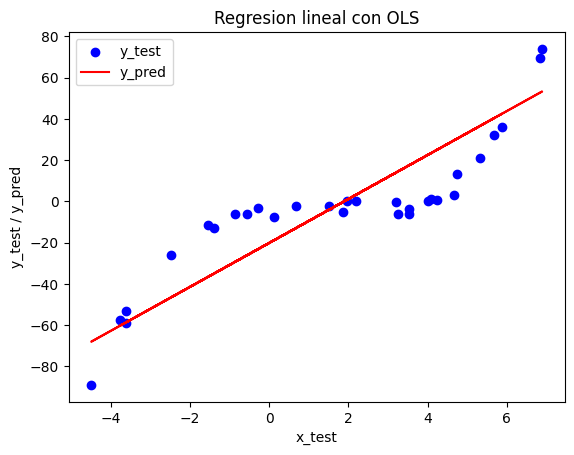

Regresion lineal con OLS
 296.0945867766399           0.7198048208163852


In [ ]:
# Asignamos las columnas
x = df['x'].values.reshape(-1, 1)  # Se cambia de x a bidimensional
y = df['y'].values

# Dividimos los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=0)

# Entrenamos el modelo
linear_OLS_model = LinearRegression()
linear_OLS_model.fit(x_train, y_train)

# Realizamos predicciones
y_pred_linear_OLS_model = linear_OLS_model.predict(x_test)

# Calculamos las métricas
mse_linear_regression_OLS = mean_squared_error(y_test, y_pred_linear_OLS_model)
r2_linear_regression_OLS = r2_score(y_test, y_pred_linear_OLS_model)

# Visualizacion de la grafica
plt.scatter(x_test, y_test, color='blue', label='y_test')
plt.plot(x_test, y_pred_linear_OLS_model, color="red", label='y_pred')
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred')
plt.title("Regresion lineal con OLS")
plt.legend()
plt.show()

# Metricas
print("Regresion lineal con OLS\n", mse_linear_regression_OLS,"         ", r2_linear_regression_OLS)


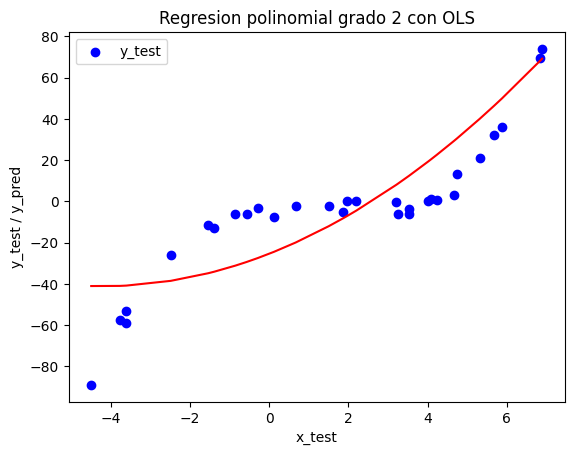

Regresion polinomial grado 2 con OLS 
 352.4373840101115          0.6664874659184127


In [ ]:
# Creamos la transformación polinomial (grado 2)
poly_features_OLS = PolynomialFeatures(degree=2)

# Aplicamos la transformación polinomial sobre x_train
x_poly_2_OLS = poly_features_OLS.fit_transform(x_train)

# Inicializamos el modelo
model_2_OLS = LinearRegression()

# Ajustamos el modelo
model_2_OLS.fit(x_poly_2_OLS, y_train)

# Predicciones sobre el conjunto de prueba usando el x_train
y_pred_2_OLS = model_2_OLS.predict(poly_features_OLS.transform(x_test))

# Calculamos el (MSE)
mse_poly_2_OLS = mean_squared_error(y_test, y_pred_2_OLS)

# Calculamos R^2
r2_poly_2_OLS = r2_score(y_test, y_pred_2_OLS)

# Creamos un DataFrame para almacenar las predicciones junto con los valores de 'x_test' para visualizarlos
dataframe = pd.DataFrame({'x_test': x_test.flatten(), 'y_pred_2_OLS': y_pred_2_OLS})
dataframe_sorted = dataframe.sort_values(by='x_test')

# Visualizacion de la grafica
plt.scatter(x_test, y_test, color='blue', label='y_test')
plt.plot(dataframe_sorted['x_test'], dataframe_sorted['y_pred_2_OLS'], color = "red")
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred')
plt.title("Regresion polinomial grado 2 con OLS")
plt.legend()
plt.show()

# Metricas
print("Regresion polinomial grado 2 con OLS \n", mse_poly_2_OLS,"        ", r2_poly_2_OLS)


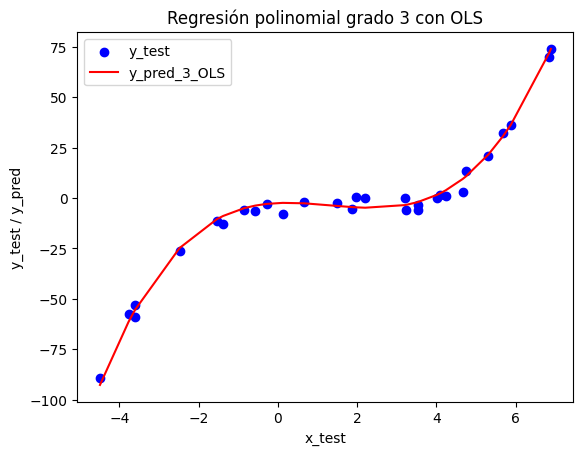

Regresión polinomial grado 3 con OLS
 8.487854131822667           0.9919679186464003


In [ ]:
# Creamos la transformación polinomial (grado 3)
poly_features_OLS_3 = PolynomialFeatures(degree=3)

# Aplicamos la transformación polinomial sobre x_train
x_poly_3_OLS = poly_features_OLS_3.fit_transform(x_train)

# Inicializamos el modelo de regresión lineal
model_3_OLS = LinearRegression()

# Ajustamos el modelo
model_3_OLS.fit(x_poly_3_OLS, y_train)

# Realizamos predicciones usando el modelo ajustado
y_pred_3_OLS = model_3_OLS.predict(poly_features_OLS_3.transform(x_test))

# Calculamos el (MSE)
mse_poly_3_OLS = mean_squared_error(y_test, y_pred_3_OLS)

# Calculamos (R^2)
r2_poly_3_OLS = r2_score(y_test, y_pred_3_OLS)

dataframe['y_pred_3_OLS'] = y_pred_3_OLS
dataframe_sorted = dataframe.sort_values(by='x_test')

# Visualización de la gráfica:
plt.scatter(x_test, y_test, color='blue', label='y_test')
plt.plot(dataframe_sorted['x_test'], dataframe_sorted['y_pred_3_OLS'], color="red", label='y_pred_3_OLS')
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred')
plt.title("Regresión polinomial grado 3 con OLS")
plt.legend()

# Mostramos el gráfico
plt.show()

# Imprimimos las métricas de evaluación
print("Regresión polinomial grado 3 con OLS\n", mse_poly_3_OLS, "         ", r2_poly_3_OLS)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


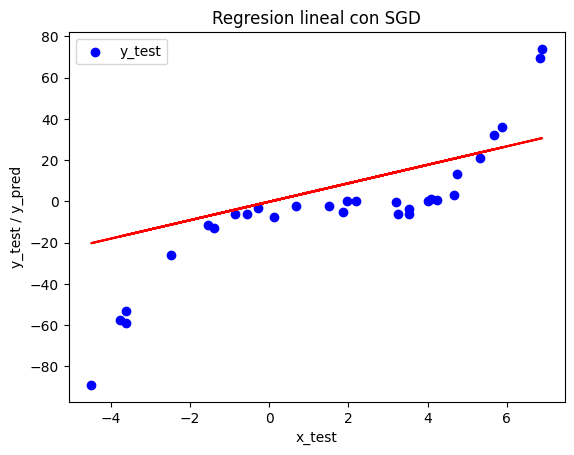

Regresión lineal con SGD
  554.9631982438548           0.47483669166316333


In [ ]:
# Definimos el modelo con descenso de gradiente estocástico (SGD)
linear_SGD_model = SGDRegressor(learning_rate='constant', max_iter=10000, eta0=0.0000001)

# Ajustamos el modelo con (x_train, y_train)
linear_SGD_model.fit(x_train, y_train.ravel())

# Predicciones con el modelo entrenado sobre (x_test).
y_pred_linear_SGD_model = linear_SGD_model.predict(x_test)

# Calculamos el Error Cuadrático Medio (MSE)
mse_linear_regression_SGD = mean_squared_error(y_test, y_pred_linear_SGD_model)

# Calculamos el coeficiente de determinación (R^2)
r2_linear_regression_SGD = r2_score(y_test, y_pred_linear_SGD_model)

# Graficamos los resultados
plt.scatter(x_test, y_test, color='blue', label='y_test')
plt.plot(x_test, y_pred_linear_SGD_model, color="red")
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred')
plt.title("Regresion lineal con SGD")
plt.legend()
plt.show()

# Imprimimos las métricas
print("Regresión lineal con SGD\n ", mse_linear_regression_SGD, "         ", r2_linear_regression_SGD)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


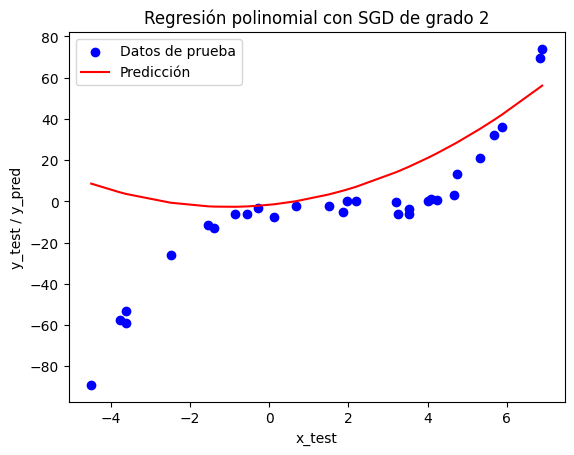

Regresion polinomial grado 2 con SGD
 872.4338727841549      0.1744132576965537


In [ ]:
# Función para el calculo de MSE y R2
def total(x_test, y_test, regresion):
    prediction = regresion.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    return mse, r2

# Función para graficar los resultados
def Grafica_Regresion(x_test, y_test, y_pred, title):
    plt.scatter(x_test, y_test, color='blue', label='Datos de prueba')
    plt.plot(x_test, y_pred, color='red', label='Predicción')
    plt.xlabel('x_test')
    plt.ylabel('y_test / y_pred')
    plt.title(title)
    plt.legend()
    plt.show()

# Función de regresión polinómica de grado 2 con SGD
def RegresionSGD(x_train, y_train, x_test, y_test):
    # Crear un pipeline para la regresión polinómica de grado 2 con SGDRegressor
    model_SGD_poly = make_pipeline(PolynomialFeatures(degree=2), SGDRegressor(learning_rate='constant', max_iter=10000, eta0=0.0000001))
    model_SGD_poly.fit(x_train.reshape(-1, 1), y_train)

    # Evaluar el modelo
    mse_poly, r2_poly = total(x_test.reshape(-1, 1), y_test, model_SGD_poly)

    # Predicción y graficar  resultados
    indices = np.argsort(x_test)  # Ordenar x_test para que la gráfica sea continua
    y_pred_poly = model_SGD_poly.predict(x_test[indices].reshape(-1, 1))
    Grafica_Regresion(x_test[indices], y_test[indices], y_pred_poly, 'Regresión polinomial con SGD de grado 2')
    return mse_poly, r2_poly

# Dividir los datos en conjunto de entrenamiento y prueba
x = data['x'].values
y = data['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

# Llamar a la función de regresión con SGD
mse_poly_2_SGD, r2_poly_2_SGD = RegresionSGD(x_train, y_train, x_test, y_test)

# Imprimir los resultados de MSE y R²
print("Regresion polinomial grado 2 con SGD\n", mse_poly_2_SGD, "    ", r2_poly_2_SGD)


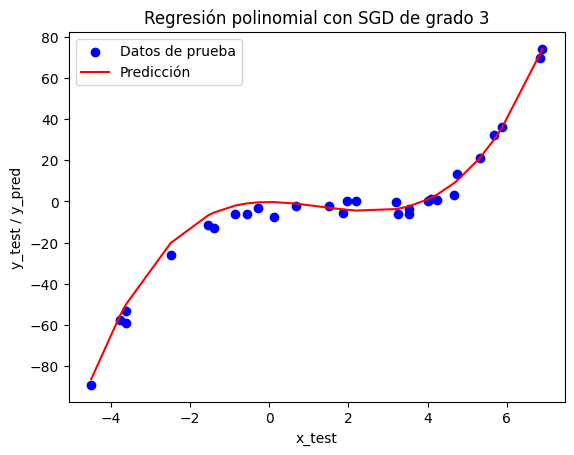

Regresión Polinómica con SGD de grado 3
 15.525815648136952      0.9853078749434108


In [ ]:
# Función para el calculo de MSE y R2
def total(x_test, y_test, regresion):
    prediction = regresion.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    return mse, r2

# Función para graficar los resultados
def Grafica_Regresion(x_test, y_test, y_pred, title):
    plt.scatter(x_test, y_test, color='blue', label='Datos de prueba')
    plt.plot(x_test, y_pred, color='red', label='Predicción')
    plt.xlabel('x_test')
    plt.ylabel('y_test / y_pred')
    plt.title(title)
    plt.legend()
    plt.show()

# Función de regresión polinómica de grado 3 con SGD
def RegresionSGD_grado_3(x_train, y_train, x_test, y_test):
    model_SGD_poly_3 = make_pipeline(PolynomialFeatures(degree=3), SGDRegressor(learning_rate='constant', max_iter=10000, eta0=0.0000001))
    model_SGD_poly_3.fit(x_train.reshape(-1, 1), y_train)

    # Evaluar el modelo
    mse_poly_3, r2_poly_3 = total(x_test.reshape(-1, 1), y_test, model_SGD_poly_3)

    # Predicción y graficar los resultados
    indices = np.argsort(x_test)  # Ordenar x_test para que la gráfica sea continua
    y_pred_poly_3 = model_SGD_poly_3.predict(x_test[indices].reshape(-1, 1))
    Grafica_Regresion(x_test[indices], y_test[indices], y_pred_poly_3, 'Regresión polinomial con SGD de grado 3')
    return mse_poly_3, r2_poly_3

# Dividir los datos en conjunto de entrenamiento y prueba
x = data['x'].values
y = data['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

# Llamar a la función de regresión con SGD para grado 3 y almacenar los resultados
mse_poly_3_SGD, r2_poly_3_SGD = RegresionSGD_grado_3(x_train, y_train, x_test, y_test)

# Imprimir los resultados de MSE y R² fuera de la función
print("Regresión Polinómica con SGD de grado 3\n", mse_poly_3_SGD, "    ", r2_poly_3_SGD)


In [ ]:
print("Resumen de los resultados\n")
print("Regresiones                                             mse                   r2\n")
print("Regresion lineal con OLS                   ", mse_linear_regression_OLS, "         ", r2_linear_regression_OLS)
print("Regresion polinomial grado 2 con OLS       ", mse_poly_2_OLS, "        ", r2_poly_2_OLS)
print("Regresion polinomial grado 3 con OLS       ", mse_poly_3_OLS, "         ", r2_poly_3_OLS)
print("Regresion lineal con SGD                   ", mse_linear_regression_SGD, "         ", r2_linear_regression_SGD)
print("Regresion polinomial grado 2 con SGD       ", mse_poly_2_SGD, "        ", r2_poly_2_SGD)
print("Regresion polinomial grado 3 con SGD       ", mse_poly_3_SGD, "          ", r2_poly_3_SGD)


Resumen de los resultados

Regresiones                                             mse                   r2

Regresion lineal con OLS                    296.0945867766399           0.7198048208163852
Regresion polinomial grado 2 con OLS        352.4373840101115          0.6664874659184127
Regresion polinomial grado 3 con OLS        8.487854131822667           0.9919679186464003
Regresion lineal con SGD                    554.9635093498797           0.47483639726261595
Regresion polinomial grado 2 con SGD        872.4320790688537          0.174414955094624
Regresion polinomial grado 3 con SGD        15.754030515852254            0.9850919145422161


# Programa 2

In [ ]:
#Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import operator


# Dataset y su visualización

df = pd.read_csv('/content/drive/MyDrive/Prácticas Machine Learning/Práctica 4_Regresión_polinomial_Machine_Learning/cal_housing.csv')
df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
# Asignamos las columnas
X = df.iloc[:, :-1].values
Y = df.iloc[:,-1].values

# Dividimos los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=0)


In [ ]:
# Crear modelo de regresión lineal
linear_model = LinearRegression()

# Ajustar el modelo a (x_train, y_train)
linear_model.fit(x_train, y_train)

#Prediccion con el modelo ajustado utilizando (x_test)
y_pred_linear_model = linear_model.predict(x_test)

# Calcular el Error Cuadrático Medio (MSE)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_model)

# Calcular el coeficiente de determinación R²
r2_linear_regression = r2_score(y_test, y_pred_linear_model)


In [ ]:
# Crear modelo polinomial con grado 2
poly_features_2 = preprocessing.PolynomialFeatures(degree=2)

# Transformar los datos de entrenamiento y prueba
x_poly_train_2 = poly_features_2.fit_transform(x_train)
x_poly_test_2 = poly_features_2.transform(x_test)

# Crear una instancia de regresión lineal
model_2 = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento transformados
model_2.fit(x_poly_train_2, y_train)

#Prediccion con el modelo ajustado
y_pred_2 = model_2.predict(x_poly_test_2)

# Calcular el Error Cuadrático Medio (MSE)
mse_poly_2 = mean_squared_error(y_test, y_pred_2)

# Calcular el coeficiente de determinación R²
r2_poly_2 = r2_score(y_test, y_pred_2)


In [ ]:
# Crear modelo de StandardScaler
scaler_Std_2 = preprocessing.StandardScaler()

# Estandarizar los datos de entrenamiento y prueba (polinómicos de grado 2)
x_train_poly_2_std = scaler_Std_2.fit_transform(x_poly_train_2)
x_test_poly_2_std = scaler_Std_2.transform(x_poly_test_2)

# Crear una instancia de regresión lineal
model_2_std = LinearRegression()

# Ajustar el modelo de regresión lineal a los datos de entrenamiento
model_2_std.fit(x_train_poly_2_std, y_train)

#Prediccion con el modelo ajustado utilizando datos de prueba estandarizados
y_pred_2_std = model_2_std.predict(x_test_poly_2_std)

# Calcular el Error Cuadrático Medio (MSE)
mse_poly_2_std = mean_squared_error(y_test, y_pred_2_std)

# Calcular el coeficiente de determinación R²
r2_poly_2_std = r2_score(y_test, y_pred_2_std)


In [ ]:
scaler_Rbt_2 = preprocessing.RobustScaler()
x_train_poly_2_rbt = scaler_Rbt_2.fit_transform(x_poly_train_2)
x_test_poly_2_rbt = scaler_Rbt_2.fit_transform(x_poly_test_2)
model_2_rbt = LinearRegression()

model_2_rbt.fit(x_train_poly_2_rbt,y_train)

y_pred_2_rbt = model_2_rbt.predict(x_test_poly_2_rbt)

mse_poly_2_rbt = mean_squared_error(y_test,y_pred_2_rbt)

r2_poly_2_rbt = r2_score(y_test,y_pred_2_rbt)



In [ ]:
# Crear modelo de PolynomialFeatures
poly_features_3 = preprocessing.PolynomialFeatures(degree=3)

# Estandarizar los datos de entrenamiento y prueba (polinómicos de grado 3)
x_poly_train_3 = poly_features_3.fit_transform(x_train)
x_poly_test_3 = poly_features_3.transform(x_test)

# Crear una instancia de regresión lineal para el modelo
model_3 = LinearRegression()

# Ajustar el modelo de regresión lineal a los datos de entrenamiento estandarizados
model_3.fit(x_poly_train_3, y_train)

#Prediccion con el modelo ajustado utilizando datos de prueba estandarizados
y_pred_3 = model_3.predict(x_poly_test_3)

# Calcular el Error Cuadrático Medio (MSE)
mse_poly_3 = mean_squared_error(y_test, y_pred_3)

# Calcular el coeficiente de determinación R²
r2_poly_3 = r2_score(y_test, y_pred_3)

In [ ]:
# Crear una instancia de StandardScaler
scaler_Std_3 = preprocessing.StandardScaler()

# Estandarizar los datos de entrenamiento y prueba (polinómicos de grado 3)
x_train_poly_3_std = scaler_Std_3.fit_transform(x_poly_train_3)
x_test_poly_3_std = scaler_Std_3.fit_transform(x_poly_test_3)

# Crear una nueva instancia del modelo de regresión lineal para el modelo
model_3_std = LinearRegression()

# Ajustar el modelo de regresión lineal a los datos de entrenamiento estandarizados
model_3_std.fit(x_train_poly_3_std, y_train)

#Prediccion con el modelo ajustado utilizando datos de prueba estandarizados
y_pred_3_std = model_3_std.predict(x_test_poly_3_std)

# Calcular el Error Cuadrático Medio (MSE)
mse_poly_3_std = mean_squared_error(y_test, y_pred_3_std)

# Calcular el coeficiente de determinación R² para evaluar el ajuste de las predicciones con los valores reales
r2_poly_3_std = r2_score(y_test, y_pred_3_std)


In [ ]:
# Crear una instancia de RobustScaler
scaler_Rbt_3 = preprocessing.RobustScaler()

# Aplicar el escalado robusto a los datos entrenamiento y prueba (polinómicos de grado 3)

x_test_poly_3_rbt = scaler_Rbt_3.fit_transform(x_poly_test_3)

# Crear una nueva instancia de regresión lineal
model_3_rbt = LinearRegression()

# Ajustar el modelo de regresión lineal usando los datos de entrenamiento escalados de manera robusta (polinómicos de grado 3)
model_3_rbt.fit(x_train_poly_3_rbt, y_train)

#Prediccion con el modelo ajustado utilizando datos de prueba escalados de manera robusta (polinómicos de grado 3)
y_pred_3_rbt = model_3_rbt.predict(x_test_poly_3_rbt)

# Calcular el Error Cuadrático Medio (MSE)
mse_poly_3_rbt = mean_squared_error(y_test, y_pred_3_rbt)

# Calcular el coeficiente de determinación R²
r2_poly_3_rbt = r2_score(y_test, y_pred_3_rbt)


In [ ]:
#Tabla de resultados
print("Resumen de los resultados\n")
print("Regresiones OLS                                                                     mse                   r2\n")
print("Regresion lineal                                                            ", mse_linear_regression,"         ", r2_linear_regression)
print("Regresion polinomial grado 2                                                ", mse_poly_2,"         ", r2_poly_2)
print("Regresion polinomial grado 2 con escalamiento estandar                      ", mse_poly_2_std,"        ", r2_poly_2_std)
print("Regresion polinomial grado 2 con escalamiento robusto                       ", mse_poly_2_rbt,"         ", r2_poly_2_rbt)
print("Regresion polinomial grado 3                                                ", mse_poly_3,"        ", r2_poly_3)
print("Regresion polinomial grado 3 con escalamiento estandar                      ", mse_poly_3_std,"        ", r2_poly_3_std)
print("Regresion polinomial grado 3 con escalamiento robusto                       ", mse_poly_3_rbt,"         ", r2_poly_3_rbt)

Resumen de los resultados

Regresiones OLS                                                                     mse                   r2

Regresion lineal                                                             4853781771.947973           0.6277645980446445
Regresion polinomial grado 2                                                 4076152869.9031973           0.6874007787641105
Regresion polinomial grado 2 con escalamiento estandar                       4111950340.711673          0.6846554790037485
Regresion polinomial grado 2 con escalamiento robusto                        5047513814.436831           0.6129073324946668
Regresion polinomial grado 3                                                 4141446514.441093          0.682393424259596
Regresion polinomial grado 3 con escalamiento estandar                       8862039818.106482          0.3203722151452775
Regresion polinomial grado 3 con escalamiento robusto                        8684145317952.321           -664.985096764945